In [1]:
%cd '/home/urbanaq/aquv'

/home/urbanaq/aquv


In [2]:
from bin.utils import read_config

config = read_config('/home/urbanaq/aquv/config')

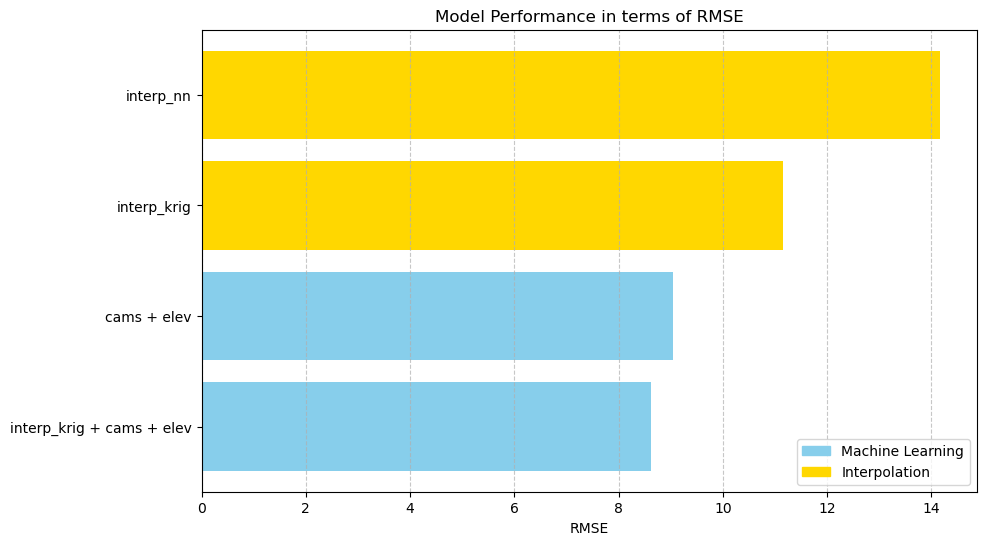

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# Data
data = [
    ('cams + elev', 9.04),
    ('interp_nn', 14.16),
    ('interp_krig', 11.16),
    ('interp_krig + cams + elev', 8.62)
]

# Create DataFrame
df = pd.DataFrame(data, columns=['Model', 'RMSE'])

# Sort DataFrame by RMSE in decreasing order
df_sorted = df.sort_values(by='RMSE', ascending=False)

# Using softer colors for the plot
soft_colors = ['#87CEEB' if 'cams' in model or 'elev' in model else '#FFD700' for model in df_sorted['Model']]

plt.figure(figsize=(10, 6))
bars = plt.barh(df_sorted['Model'], df_sorted['RMSE'], color=soft_colors)

# Adding legend with softer colors
machine_learning_patch = mpatches.Patch(color='#87CEEB', label='Machine Learning')
interpolation_patch = mpatches.Patch(color='#FFD700', label='Interpolation')
plt.legend(handles=[machine_learning_patch, interpolation_patch])

plt.xlabel('RMSE')
plt.title('Model Performance in terms of RMSE')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display plot
plt.show()
